# CSE475 Project Bonus, Due: Monday, 05/02/2022

## Instruction

1. Please submit your Jupyter Notebook file (the. ipynb file) containing your code and the outputs produced by your code (note that .ipynb file can contain both the code and the outputs) to Canvas. Please name your file CSE475-ProjectBonus-LastName-FirstName.ipynb.

2. If you have any questions on the homework problems, you should post your question on the Canvas discussion board (under Project Q&A), instead of sending emails to the instructor or TA. We will answer your questions there. In this way, we can avoid repeated questions, and help the entire class stay on the same page whenever any clarification/correction is made.

## Building a Convolutional Neural Network to classify images in the CIFAR-10 Dataset

We will work with the CIFAR-10 Dataset.  This is a well-known dataset for image classification, which consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The 10 classes are:

<ol start="0">
<li> airplane
<li>  automobile
<li> bird
<li>  cat
<li> deer
<li> dog
<li>  frog
<li>  horse
<li>  ship
<li>  truck
</ol>

For details about CIFAR-10 see:
https://www.cs.toronto.edu/~kriz/cifar.html

For a compilation of published performance results on CIFAR 10, see:
http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html

---

### Building CNN

In this project we will build and train our convolutional neural network. In the first part, we walk through different layers and how they are configured. In the second part, you will build your own model, train it, and compare the performance.

In [1]:
from __future__ import print_function
import keras
import tensorflow
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

2022-05-02 23:36:21.993136: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-02 23:36:21.993165: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
## Each image is a 32 x 32 x 3 numpy array
x_train[444].shape

(32, 32, 3)

[9]


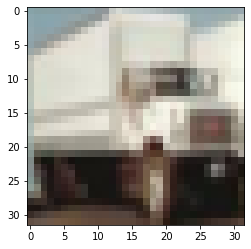

In [4]:
## Let's look at one of the images

print(y_train[444])
plt.imshow(x_train[444]);

In [5]:
# convert class labels to one-hot vectors
num_classes = 10

y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

In [6]:
# see some one-hot vector
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [7]:
# As before, let's make everything float and scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## First CNN
Below we will build our first CNN.  For demonstration purpose (so that it will br trained quickly) it is not very deep and has relatively few parameters.  We use strides of 2 in the first two convolutional layers which quickly reduces the dimensions of the output. After a MaxPooling layer, we flatten, and then have a single fully connected layer before the final classification layer.

In [ ]:
# Let's build a CNN using Keras' Sequential capabilities

model_1 = Sequential()

## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

We still have 181K parameters, even though this is a "small" model.


In [ ]:
batch_size = 128

# initiate RMSprop optimizer
opt = tensorflow.keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test),
              shuffle=True)

In [ ]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

## Your task (25pts)

Our previous model (model_1) had the structure:

Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification (with activation functions and dropouts)

Please built a different model (named model_2) by trying different structures and different hyperparameters, such as number of neurons, layers, stride, padding, dropout rate, kernel size, learning rate, number of epochs, etc. You can choose to add data augmentation, batch normalization and/or something new.<br>

For example: <br>
A deeper model: Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification
<br>

Report the best test accuracy achieved. You will be graded on the highest test accuracy achieved:<br>
Test accuracy < Base model (model_1) : 0 - 5pts (Depending on the changes made in model_2)<br>
Base model (model_1) < Test accuracy < 70%: 5 - 10pts (Depending on the changes made in model_2)<br>
70% < Test accuracy < 75%: 15pts<br>
75% < Test accuracy: 25pts <br>

In [11]:
# Let's build a CNN using Keras' Sequential capabilities
model_2 = Sequential()

In [12]:

model_2.add(Conv2D(32, (3, 3), strides = (2,2),activation="relu", padding='same', input_shape=x_train.shape[1:]))
model_2.add(BatchNormalization())
model_2.add(Conv2D(32, (3, 3), strides = (2,2), activation="relu", padding="same"))
model_2.add(MaxPooling2D((2, 2),padding = "same"))
model_2.add(BatchNormalization())

model_2.add(Conv2D(64, (3, 3), strides = (2,2),activation="relu", padding='same', input_shape=x_train.shape[1:]))
model_2.add(BatchNormalization())
model_2.add(Conv2D(64, (3, 3), strides = (2,2), activation="relu", padding="same"))
model_2.add(MaxPooling2D((2, 2),padding = "same"))
model_2.add(BatchNormalization())

model_2.add(Conv2D(128, (3, 3), strides = (2,2),activation="relu", padding='same', input_shape=x_train.shape[1:]))
model_2.add(BatchNormalization())
model_2.add(Conv2D(128, (3, 3), strides = (2,2), activation="relu", padding="same"))
model_2.add(MaxPooling2D((2, 2),padding = "same"))
model_2.add(BatchNormalization())



model_2.add(Flatten())
model_2.add(Dropout(0.3))
model_2.add(Dense(512, activation="relu"))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.3))

model_2.add(Dense(num_classes, activation="softmax"))

batch_size = 128

# initiate RMSprop optimizer
opt = tensorflow.keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=100,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/100


2022-05-02 23:37:32.108781: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


391/391 [==============================] - 17s 39ms/step - loss: 1.6814 - accuracy: 0.3939 - val_loss: 1.9531 - val_accuracy: 0.3100
Epoch 2/100
391/391 [==============================] - 15s 38ms/step - loss: 1.3342 - accuracy: 0.5231 - val_loss: 1.2667 - val_accuracy: 0.5493
Epoch 3/100
391/391 [==============================] - 14s 37ms/step - loss: 1.1937 - accuracy: 0.5757 - val_loss: 1.2002 - val_accuracy: 0.5754
Epoch 4/100
391/391 [==============================] - 15s 38ms/step - loss: 1.0984 - accuracy: 0.6107 - val_loss: 1.2254 - val_accuracy: 0.5782
Epoch 5/100
391/391 [==============================] - 15s 39ms/step - loss: 1.0308 - accuracy: 0.6370 - val_loss: 1.1435 - val_accuracy: 0.6061
Epoch 6/100
391/391 [==============================] - 16s 41ms/step - loss: 0.9690 - accuracy: 0.6575 - val_loss: 1.0606 - val_accuracy: 0.6283
Epoch 7/100
391/391 [==============================] - 15s 38ms/step - loss: 0.9241 - accuracy: 0.6741 - val_loss: 1.0721 - val_accuracy: 0.62

391/391 [==============================] - 18s 45ms/step - loss: 0.3291 - accuracy: 0.8824 - val_loss: 1.7019 - val_accuracy: 0.6544
Epoch 58/100
391/391 [==============================] - 18s 46ms/step - loss: 0.3267 - accuracy: 0.8834 - val_loss: 1.7198 - val_accuracy: 0.6431
Epoch 59/100
391/391 [==============================] - 18s 46ms/step - loss: 0.3278 - accuracy: 0.8835 - val_loss: 1.8631 - val_accuracy: 0.6359
Epoch 60/100
391/391 [==============================] - 20s 50ms/step - loss: 0.3219 - accuracy: 0.8837 - val_loss: 1.7593 - val_accuracy: 0.6427
Epoch 61/100
391/391 [==============================] - 20s 51ms/step - loss: 0.3176 - accuracy: 0.8863 - val_loss: 1.7814 - val_accuracy: 0.6462
Epoch 62/100
383/391 [============================>.] - ETA: 0s - loss: 0.3126 - accuracy: 0.8889

KeyboardInterrupt: 

In [13]:
# Test the model on test data
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.8181278705596924
Test accuracy: 0.6388999819755554
